# ASSUMPTIONS:
- resolution area set to 2 m2 like the spotlight mode of tandem x
- ship size 30x7 i.e. medium ship in dlr journal paper
- NESZ value static from resolution area for Pfa = 1e-6
- incidence angle 35 degrees (close to what we get from timing considerations)

## independent parameters

In [1]:
Ares = 1.8  # m^2
Aship = 30 * 7  # m^2
Pfa = 1e-6
Pdmin = 0.5

# ship class statistics for medium size ships [dlr]
mean = -.002
var = 4.66

# looking angle
look_angle = 35  # deg

## dependent parameters

In [2]:
from design_functions import *
from scipy.optimize import fsolve, root_scalar
import numpy as np

In [3]:


func = lambda n: pd_from_nesz_res(n, Ares, Pfa, Aship, mean, var) - Pdmin

nesz = fsolve(func, 5, full_output=True)
print(nesz)
nesz = float(nesz[0])
print(nesz)
print('NESZ = ', 10 * np.log10(nesz), 'dB')


(array([12.29159555]), {'nfev': 8, 'fjac': array([[-1.]]), 'r': array([0.03717831]), 'qtf': array([-2.91426994e-09]), 'fvec': array([1.50990331e-14])}, 1, 'The solution converged.')
12.291595549342889
NESZ =  10.89608261511251 dB


## trade off analysis

In [4]:
from swath_optimization_functions import *

# ground swath
wg = np.array([20, 30, 40, 50, 60, 70]) * 1e3

Plist = []
Blist = []
# antenna length vector
La = np.linspace(0.5, 4, 23)

for ii in range(len(wg)):
    P, B = model_param(nesz, Ares, wg[ii], La, look_angle)
    Plist.append(P)
    Blist.append(B)
    print(ii, '/', len(wg))

100%|██████████| 23/23 [00:17<00:00,  1.31it/s]


0 / 6


100%|██████████| 23/23 [00:14<00:00,  1.57it/s]


1 / 6


100%|██████████| 23/23 [00:14<00:00,  1.57it/s]


2 / 6


100%|██████████| 23/23 [00:19<00:00,  1.18it/s]


3 / 6


100%|██████████| 23/23 [00:13<00:00,  1.72it/s]


4 / 6


100%|██████████| 23/23 [00:14<00:00,  1.56it/s]

5 / 6


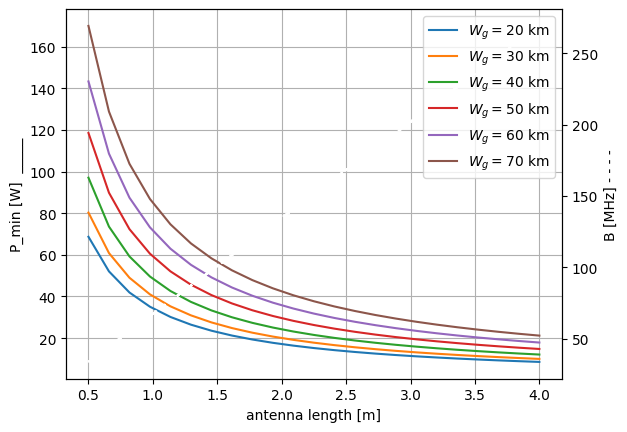

In [5]:
# plotting
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

fig, ax = plt.subplots(1)
ax2 = ax.twinx()
for P in Plist:
    ax.plot(La, P)

for B in Blist:
    ax2.plot(La, B / 1e6, '--', color='white')

ax.set_xlabel('antenna length [m]')
ax.set_ylabel('P_min [W]  _____')
ax2.set_ylabel('B [MHz] - - - -')

legend = []
for ww in wg:
    st = '$W_g = $'+ str(round(ww/1000))+' km'
    legend.append(st)
leg = ax.legend(legend)
ax.grid()
leg.remove()
ax2.add_artist(leg)
plt.savefig('Pvsal.svg')

## Antenna length vs swath width
given the maximum power, find the antenna length

In [6]:
pmax = 25  #W

In [7]:
def length_vs_p(la, wg):
    La = np.array([la])
    P, B = model_param(nesz, Ares, wg, La, look_angle)
    return float(P)


# test
func = lambda l: length_vs_p(l, 20e3) - pmax
la = root_scalar(func,
                 method='secant',
                 x0=0.5,
                 x1=3.5)
la = la.root

100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


In [8]:
la

1.3711810155802526

In [ ]:
# optimize pmax
Llist = []

for w in wg:
    print(w)
    func = lambda l: length_vs_p(l, w) - pmax
    la = root_scalar(func,
                     method='secant',
                     x0=0.5,
                     x1=3.8)
    la = la.root
    Llist.append(la)

20000.0


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Llist

In [ ]:
# plotting
fig, ax = plt.subplots(1)
ax.plot(wg*1e-3, Llist)

## Same but for an higher pmax

In [ ]:
# SAME BUT FOR AN HIGHER pMAX
pmax = 50 # w
# optimize pmax
Llist1 = []

for w in wg:
    print(w)
    func = lambda l: length_vs_p(l, w) - pmax
    la = root_scalar(func,
                     method='secant',
                     x0=0.51,
                     x1=2)
    la = la.root
    Llist1.append(la)


In [ ]:
fig, ax = plt.subplots(1)
# plt.style.use('dark_background')
ax.plot(wg*1e-3, Llist)
ax.plot(wg*1e-3, Llist1)
ax.set_xlabel('Swath Width [km]')
ax.set_ylabel('Antenna Length [m]')
legend = ['$P_{avg}$= 25 W', '$P_{avg}$= 50 W']
ax.legend(legend)
ax.grid()
#plt.show()
plt.savefig('antennalvsswath.svg')